# 📥 Importing Libraries

In [3]:
import re
import json
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
# !pip install wordcloud

# 🗃️ Load Dataset

In [5]:
path ='./News_Category_Dataset_v2.json'

In [6]:
list_ = []
with open(path) as files:
    for file in files:
        list_.append(json.loads(file))

# 📝 Meta information of Dataframe

In [7]:
data = pd.DataFrame(list_)
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200853 non-null  object
 2   authors            200853 non-null  object
 3   link               200853 non-null  object
 4   short_description  200853 non-null  object
 5   date               200853 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB


# 🔎 Checking for NaN values

In [9]:
data.isnull().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

# 🔥 EDA & Visualization

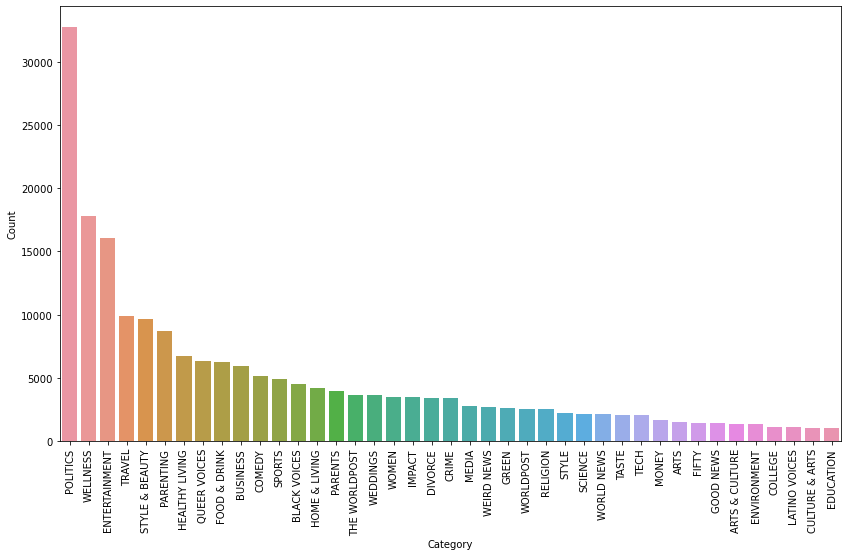

In [10]:
plt.figure(figsize=(14,8))
count = data.category.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90);

# 🧹 Cleaning Data

In [11]:
def clean_text(text):
    text = text.lower()                                  # lower-case all characters
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return text

In [43]:
nltk.download('punkt')
nltk.download('stopwords')
data['Text_cleaning'] = data.headline.apply(clean_text)
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,headline,authors,link,short_description,date,Text_cleaning
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,mass shootings texas last week
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,smith joins diplo nicky jam world cups officia...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,hugh grant marries first time age
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,jim carrey blasts castrato adam schiff democra...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,julianna margulies uses donald trump poop bags...


In [60]:
data.to_json('./data.json')

# 🔢 The process of converting words into numbers

In [31]:
vectorizer = CountVectorizer()
data_vectorizer = vectorizer.fit_transform(data['Text_cleaning'])

In [32]:
labels = data['category']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_vectorizer, labels, test_size=0.2, random_state=42)

In [34]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [35]:
y_pred = nb.predict(X_test)

In [36]:
Acc_train = nb.score(X_train, y_train)
acc_test = nb.score(X_test, y_test)
print('Train Accuracy : {:.2f}%'.format(Acc_train*100))
print('Test Accuracy  : {:.2f}%'.format(acc_test*100))

Train Accuracy : 47.07%
Test Accuracy  : 39.68%


In [37]:
print(classification_report(y_test, y_pred))

C:\Users\prabh\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabh\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

          ARTS       0.25      0.01      0.02       298
ARTS & CULTURE       0.00      0.00      0.00       283
  BLACK VOICES       0.49      0.05      0.08       882
      BUSINESS       0.38      0.17      0.24      1121
       COLLEGE       0.50      0.00      0.01       243
        COMEDY       0.61      0.03      0.06      1068
         CRIME       0.51      0.14      0.21       650
CULTURE & ARTS       0.93      0.06      0.11       222
       DIVORCE       0.85      0.28      0.42       696
     EDUCATION       0.50      0.01      0.01       188
 ENTERTAINMENT       0.37      0.42      0.39      3139
   ENVIRONMENT       0.88      0.03      0.05       275
         FIFTY       0.00      0.00      0.00       269
  FOOD & DRINK       0.56      0.47      0.51      1265
     GOOD NEWS       0.00      0.00      0.00       276
         GREEN       0.42      0.05      0.08       515
HEALTHY LIVING       0.35      0.01      0.03  

C:\Users\prabh\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
nb.predict_proba(X_test).shape

(40171, 41)

In [39]:
data_vectorizer.shape

(200853, 74229)

In [40]:
v = vectorizer.transform(['I am a good boy'])

In [41]:
data.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [59]:
import pickle as pkl 


pkl.dump(vectorizer,open('vectorizer.pkl','wb'))
# pkl.dump(nb,open('classifier.pkl','wb'))


In [44]:
data_main = data[['headline','Text_cleaning']]

In [45]:
data_main.head()

,headline,Text_cleaning
0,There Were 2 Mass Shootings In Texas Last Week...,mass shootings texas last week
1,Will Smith Joins Diplo And Nicky Jam For The 2...,smith joins diplo nicky jam world cups officia...
2,Hugh Grant Marries For The First Time At Age 57,hugh grant marries first time age
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,jim carrey blasts castrato adam schiff democra...
4,Julianna Margulies Uses Donald Trump Poop Bags...,julianna margulies uses donald trump poop bags...


In [50]:
d = nb.predict_proba(vectorizer.transform(data_main['Text_cleaning']))

In [57]:
pkl.dump(d,open('preds.pkl','wb'))

In [58]:
d.shape

(200853, 41)